<a href="https://colab.research.google.com/github/jane95924/WEEK_14_IP/blob/master/PART_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ANOMALY DETECTION

In [31]:
#loading our dataset
data<-read.csv('http://bit.ly/CarreFourSalesDataset')
#previewing the head
head(data)

,Date,Sales
,<fct>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [ ]:
#previewing the tail
tail(data)

,Date,Sales
,<fct>,<dbl>
995,2/18/2019,63.9975
996,1/29/2019,42.3675
997,3/2/2019,1022.4900
998,2/9/2019,33.4320
999,2/22/2019,69.1110
1000,2/18/2019,649.2990


##Initial Exploration

In [ ]:
#checking our dataset dimension.
dim(data)

[1] 1000    2

We have 1000 rows and 2 columns.

In [ ]:
#checking our dataset structure.
str(data)

'data.frame':	1000 obs. of  2 variables:
 $ Date : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [ ]:
#check the summary of our dataset
summary(data)

        Date         Sales        
 2/7/2019 : 20   Min.   :  10.68  
 2/15/2019: 19   1st Qu.: 124.42  
 1/8/2019 : 18   Median : 253.85  
 3/14/2019: 18   Mean   : 322.97  
 3/2/2019 : 18   3rd Qu.: 471.35  
 1/23/2019: 17   Max.   :1042.65  
 (Other)  :890                    

In [ ]:
#checking the class of our columns.
sapply(data,class)

Date     Sales 
 "factor" "numeric"

We will change the date data type to date.

##DATA CLEANING

In [ ]:
#we check for null values.
anyNA(data)

[1] FALSE

We have no null values

In [ ]:
#we check for duplicates
anyDuplicated(data)

[1] 0

We got no duplicates in the dataset.

In [32]:
data$Date <- as.Date(data$Date, format = "%m/%d/%Y")

ANOMALY DETECTION

In [3]:
# Installing anomalize package
install.packages("anomalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘hexbin’, ‘data.table’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’




In [4]:
# Load tidyverse and anomalize
library(tidyverse)
library(anomalize)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [5]:
suppressWarnings(
        suppressMessages(if
                         (!require(dplyr, quietly=TRUE))
                install.packages("dplyr")))
library(dplyr)

In [6]:
suppressWarnings(
        suppressMessages(if
                         (!require(tibble, quietly=TRUE))
                install.packages("tibble")))
library(tibble)

In [7]:
suppressWarnings(
        suppressMessages(if
                         (!require(tibbletime, quietly=TRUE))
                install.packages("tibbletime")))
library(tibbletime)

In [33]:
#converting the date formart
data[["Date"]] <- as.POSIXct(data$Date, tz=Sys.timezone())


In [34]:
#For Anomaly Detection using anomalize, we need to have either a tibble or tibbletime object.
# Hence we have to convert the dataframe data into a tibble object that follows a time series shape
# and store it in data_tb
data_tb<-as_tibble(data)
head(data_tb)

Date,Sales
<dttm>,<dbl>
2019-01-05,548.9715
2019-03-08,80.2200
2019-03-03,340.5255
2019-01-27,489.0480
2019-02-08,634.3785
2019-03-25,627.6165


In [22]:
data_tb = data %>%
                as_tibble()

In [29]:
data_tb<-data_tb %>%
                   tibbletime::as_tbl_time(index=Date)

Converting from tbl_df to tbl_time.
Auto-index message: index = Date

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 seconds

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 seconds

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



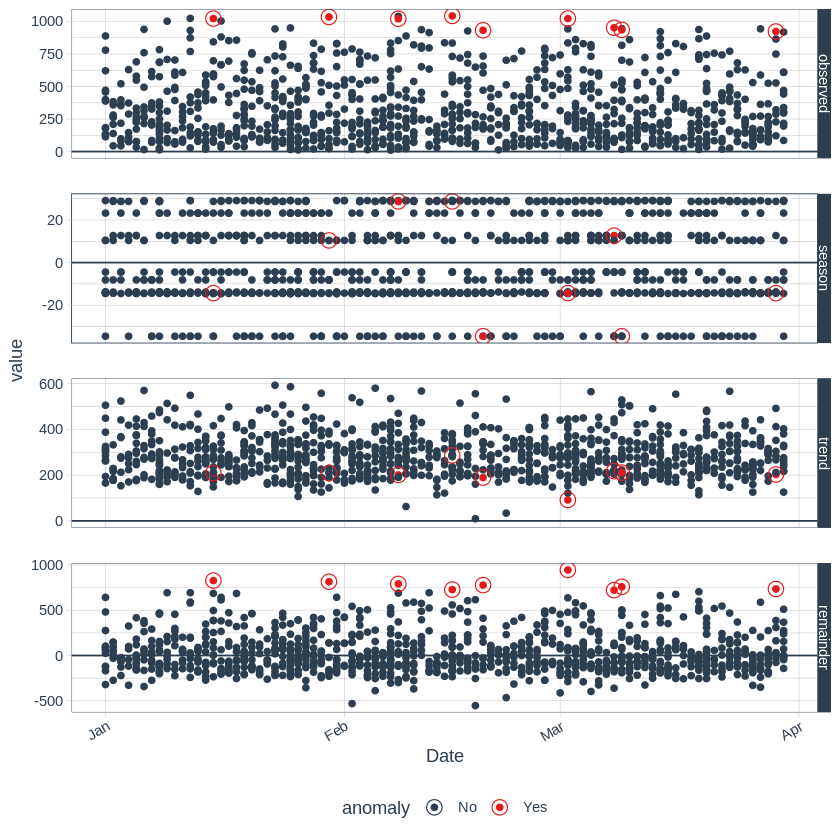

In [35]:
#anomalize has got a function time_decompose() for time series decomposition, decomposes into seasonal,Trend 
#and remainder function. 
#Once the components are decomposed, anomalize can detect and flag anomalies in the decomposed 
#data of the reminder component which then could be visualized with plot_anomaly_decomposition() .
data_tb %>%
  time_decompose(Sales, method = "stl", frequency = "auto", trend = "auto") %>%
  anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.1) %>%
  plot_anomaly_decomposition() 





Converting from tbl_df to tbl_time.
Auto-index message: index = Date

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 seconds

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 seconds



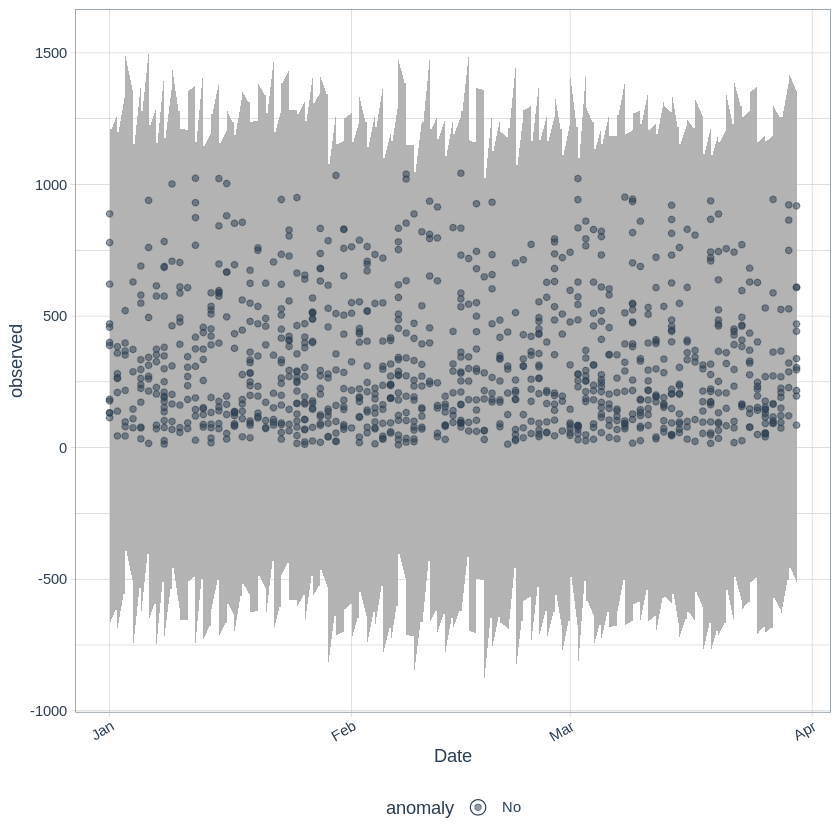

In [36]:
#decomposition , anomaly detection and plotting them
data_tb %>% 
  time_decompose(Sales) %>%
  anomalize(remainder) %>%
  time_recompose() %>%
  plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

In [37]:
#Extracting the actual data points
data_tb %>% 
  time_decompose(Sales) %>%
  anomalize(remainder) %>%
  time_recompose() %>%
  filter(anomaly == 'Yes') 

Converting from tbl_df to tbl_time.
Auto-index message: index = Date

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 seconds

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 seconds



Date,observed,season,trend,remainder,remainder_l1,remainder_l2,anomaly,recomposed_l1,recomposed_l2
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
